In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ggplot import *

/Users/yangyufan/anaconda3/lib/python3.6/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,


In [2]:
pd.set_option('display.float_format',lambda x : '%.2f' % x)

In [3]:
df_1 = pd.read_csv('Sales.csv')
df_2 = pd.read_csv('Historical.csv')

In [4]:
df_1.head(9)

,Date,Revenue,Product Line
0,1/1/15,"$108,632.40",Cars.go.com
1,1/1/15,"$31,494.02",Planes.go.com
2,1/1/15,"$239,376.48",Boats.go.com
3,1/2/15,"$552,064.80",Cars.go.com
4,1/2/15,"$238,344.12",Planes.go.com
5,1/2/15,"$37,594.56",Boats.go.com
6,1/3/15,"$334,413.60",Cars.go.com
7,1/3/15,"$51,614.01",Planes.go.com
8,1/3/15,"$24,042.72",Boats.go.com


In [5]:
df_1.dtypes

Date            object
Revenue         object
Product Line    object
dtype: object

In [6]:
df_1['Date']=pd.to_datetime(df_1['Date'])

In [7]:
df_1['Revenue']=df_1['Revenue'].str.replace('[\$,]', '').astype(float)

In [8]:
df_1.isnull().sum()

Date            0
Revenue         0
Product Line    0
dtype: int64

In [9]:
df_2.dtypes

Product Line      object
Revenue/Profit    object
Q4_2013           object
Q1_2014           object
Q2_2014           object
Q3_2014           object
Q4_2014           object
dtype: object

In [10]:
df_2['Q4_2013']=df_2['Q4_2013'].str.replace('[\$,]', '').astype(float)
df_2['Q1_2014']=df_2['Q1_2014'].str.replace('[\$,]', '').astype(float)
df_2['Q2_2014']=df_2['Q2_2014'].str.replace('[\$,]', '').astype(float)
df_2['Q3_2014']=df_2['Q3_2014'].str.replace('[\$,]', '').astype(float)
df_2['Q4_2014']=df_2['Q4_2014'].str.replace('[\$,]', '').astype(float)

In [11]:
df_2

,Product Line,Revenue/Profit,Q4_2013,Q1_2014,Q2_2014,Q3_2014,Q4_2014
0,Cars.go.com,Revenue,6085063.00,5663582.00,5701994.00,5691910.00,5906352.00
1,Planes.go.com,Revenue,32339403.00,34861524.00,36039564.00,34422242.00,45337642.00
2,Boats.go.com,Revenue,4329578.00,4418088.00,4657184.00,4597765.00,5437214.00
3,Total,Revenue,42754044.00,44943194.00,46398742.00,44711917.00,56681208.00
4,Cars.go.com,Profit,608506.30,566358.20,570199.40,569191.00,590635.20
5,Planes.go.com,Profit,161697.02,174307.62,180197.82,172111.21,226688.21
6,Boats.go.com,Profit,86591.56,88361.76,93143.68,91955.30,108744.28
7,Total,Profit,856794.88,829027.58,843540.90,833257.51,926067.69


# Time Gap Checking

## 1.Plot

In [12]:
# create 'tickers_tag' for further data visualization
Product_tag = {'Cars.go.com': 1,'Planes.go.com': 2, 'Boats.go.com': 3}
df_1['Product_tag'] = df_1['Product Line'].apply(lambda x: Product_tag[x])

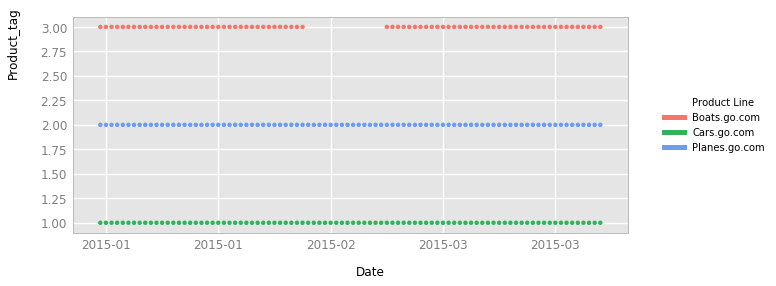

<ggplot: (7546448655)>

In [13]:
# plot the time gap
plot_df = df_1[["Date", "Product_tag", "Product Line"]].copy()
ggplot(aes(x='Date', y='Product_tag', color='Product Line'), data=plot_df)  + geom_point() + scale_x_date(labels=date_format("%Y-%m"), breaks='1 months')+ theme(plot_margin = dict(right = 40, top=0.5)) 


## 1.Conclusion
There is a obvious time gap in the Revenue_record of Boats.go.com around 2015-02

## 2.Calculation

In [14]:
# calculate the date gap for each Product Line 
df_1_date_gap = df_1.sort_values(["Product Line", "Date"])[['Product Line','Date']]
df_1_date_gap["Next_date"] = df_1_date_gap.groupby('Product Line')["Date"].shift(-1)
df_1_date_gap["Date_gap"] = df_1_date_gap.apply(lambda x: (x["Next_date"] - x["Date"]).days, axis=1)

In [15]:
df_1_date_gap[df_1_date_gap['Date_gap']>1]

,Product Line,Date,Next_date,Date_gap
110,Boats.go.com,2015-02-06,2015-02-21,15.00


In [16]:
df_1[(df_1['Product Line']=='Boats.go.com')&(df_1['Date'].dt.month==2)]

,Date,Revenue,Product Line,Product_tag
95,2015-02-01,251.04,Boats.go.com,3
98,2015-02-02,17110.08,Boats.go.com,3
101,2015-02-03,168221.28,Boats.go.com,3
104,2015-02-04,46895.52,Boats.go.com,3
107,2015-02-05,30686.40,Boats.go.com,3
110,2015-02-06,195005.76,Boats.go.com,3
141,2015-02-21,35220.00,Boats.go.com,3
144,2015-02-22,13255.68,Boats.go.com,3
147,2015-02-23,94519.20,Boats.go.com,3
150,2015-02-24,41878.56,Boats.go.com,3


## 2.Conclusion
We lost the record of Boats.go.com from 2015-02-07 to 2015-02-20

# Date Integrity Checking

In [17]:
df_1['Month'] = df_1['Date'].dt.month

In [18]:
df_1.head()

,Date,Revenue,Product Line,Product_tag,Month
0,2015-01-01,108632.40,Cars.go.com,1,1
1,2015-01-01,31494.02,Planes.go.com,2,1
2,2015-01-01,239376.48,Boats.go.com,3,1
3,2015-01-02,552064.80,Cars.go.com,1,1
4,2015-01-02,238344.12,Planes.go.com,2,1


In [19]:
df_1_monthly = df_1.groupby(['Product Line','Month'])['Date'].nunique().reset_index(name='days_count')

In [20]:
df_1_monthly

,Product Line,Month,days_count
0,Boats.go.com,1,31
1,Boats.go.com,2,14
2,Boats.go.com,3,31
3,Cars.go.com,1,31
4,Cars.go.com,2,28
5,Cars.go.com,3,31
6,Planes.go.com,1,31
7,Planes.go.com,2,28
8,Planes.go.com,3,31


## Conclusion
- *1. Date Integrity is pretty good except the 15-days' time gap in Boats.go.com*
- *2. No missing values in the data*
- *3. No duplicate rows in the data*

# Revenue Status

In [21]:
Cars = df_1[df_1['Product Line']=='Cars.go.com']
Boats = df_1[df_1['Product Line']=='Boats.go.com']
Planes = df_1[df_1['Product Line']=='Planes.go.com']

In [22]:
df_1.head()

,Date,Revenue,Product Line,Product_tag,Month
0,2015-01-01,108632.40,Cars.go.com,1,1
1,2015-01-01,31494.02,Planes.go.com,2,1
2,2015-01-01,239376.48,Boats.go.com,3,1
3,2015-01-02,552064.80,Cars.go.com,1,1
4,2015-01-02,238344.12,Planes.go.com,2,1


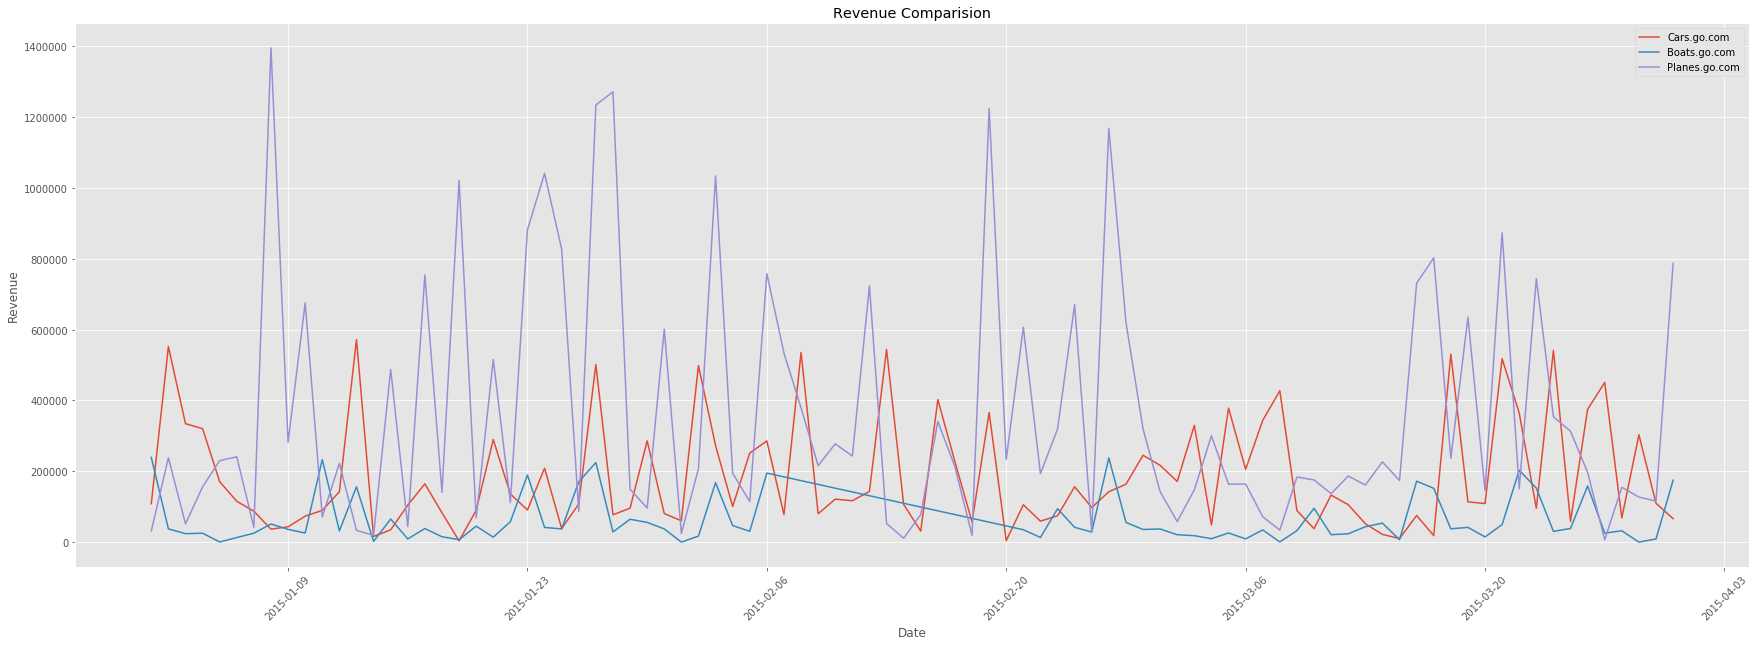

In [23]:
plt.style.use('ggplot')
plt.figure(figsize=(30,10))
plt.title("Revenue Comparision")
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.ylabel("Revenue")
plt.plot(Cars['Date'],Cars['Revenue'],'-',label="Cars.go.com")
plt.plot(Boats['Date'],Boats['Revenue'],'-',label="Boats.go.com")
plt.plot(Planes['Date'],Planes['Revenue'],'-',label="Planes.go.com")
plt.legend()
plt.grid(True)
plt.show()


In [24]:
df_1_sum = df_1.groupby('Product Line')['Revenue'].sum().reset_index(name='Q1_2015')

In [25]:
df_1_sum

,Product Line,Q1_2015
0,Boats.go.com,4736347.68
1,Cars.go.com,16757524.80
2,Planes.go.com,32529742.79


In [26]:
df_1_sum['Q1_2015'].sum()

54023615.27000001

In [27]:
df_1[df_1['Product Line']=='Cars.go.com']['Revenue'].sum()

16757524.8

# Profit Estimate

## Description
-  Profit(Cars.go.com) = Revenue(Cars.go.com)/10
-  Profit(Planes.go.com) = (Revenue(Planes.go.com)/100)/2 
-  Profit(Boats.go.com) = (Revenue(Boats.go.com)/100)*2
-  Decimal = 2

In [28]:
Q1_2015 = [16757524.80, 32529742.79, 4736347.68,54023615.27,1675752.48,162648.71,94726.95,1933128.14] 

In [29]:
df_2['Q1_2015']=Q1_2015

In [30]:
df_2

,Product Line,Revenue/Profit,Q4_2013,Q1_2014,Q2_2014,Q3_2014,Q4_2014,Q1_2015
0,Cars.go.com,Revenue,6085063.00,5663582.00,5701994.00,5691910.00,5906352.00,16757524.80
1,Planes.go.com,Revenue,32339403.00,34861524.00,36039564.00,34422242.00,45337642.00,32529742.79
2,Boats.go.com,Revenue,4329578.00,4418088.00,4657184.00,4597765.00,5437214.00,4736347.68
3,Total,Revenue,42754044.00,44943194.00,46398742.00,44711917.00,56681208.00,54023615.27
4,Cars.go.com,Profit,608506.30,566358.20,570199.40,569191.00,590635.20,1675752.48
5,Planes.go.com,Profit,161697.02,174307.62,180197.82,172111.21,226688.21,162648.71
6,Boats.go.com,Profit,86591.56,88361.76,93143.68,91955.30,108744.28,94726.95
7,Total,Profit,856794.88,829027.58,843540.90,833257.51,926067.69,1933128.14
